In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# MACHINE LEARNING PROJECT PREDICTING CRIME CATEGORIES

In this project, we have to Predict the category of crime that will occur based on various features of historical crime data. The goal is to build a model that can accurately classify the type of crime based on provided attributes.

# **IMPORTING LIBRARIES**



In [2]:
# DATA MANIPUALATION AND ANALYSIS

import pandas as pd
import numpy as np
from random import randint

# DATA VISUAlIZATION

import matplotlib.pyplot as plt
import seaborn as sns



# DATA PREPROCESSING

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# FEATURE ENGEINEERING

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion

# MODEL IMPLEMENTAION

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# METRICS AND EVALUATION

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# READING THE DATA 

In [3]:
train_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")# reading training dataset
test_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv") # reading testing dataset

# EXPLANTORY DATA ANALYSIS(EDA)

In [4]:
train_df.head() # reading top 5 rows of training dataset

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
test_df.head() # reading top 5 rows of testing dataset

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [6]:
train_df.shape # shape of train dataset

(20000, 22)

In [7]:
test_df.shape # shape of test dataset

(5000, 21)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

# SUMMARY STATISTICS

In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Latitude,20000.0,33.940704,2.126810,0.0000,34.0092,34.0587,34.165025,34.3281
Longitude,20000.0,-117.893072,7.377726,-118.6634,-118.4297,-118.3230,-118.274400,0.0000
Time_Occurred,20000.0,1352.380350,646.100291,1.0000,930.0000,1430.0000,1900.000000,2359.0000
Area_ID,20000.0,10.834250,6.033166,1.0000,6.0000,11.0000,16.000000,21.0000
Reporting_District_no,20000.0,1129.599200,603.330519,101.0000,632.0000,1162.0000,1622.000000,2197.0000
Part 1-2,20000.0,1.418150,0.493267,1.0000,1.0000,1.0000,2.000000,2.0000
Victim_Age,20000.0,30.135000,21.863645,-2.0000,12.0000,31.0000,46.000000,99.0000
Premise_Code,20000.0,297.176950,212.007298,101.0000,101.0000,203.0000,501.000000,969.0000
Weapon_Used_Code,7335.0,366.405044,120.485687,101.0000,312.0000,400.0000,400.000000,515.0000


# CHECKING NULL VALUES IN OUR DATASET

In [10]:
train_df.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

# We Can See ,7 Columns Contains Null Values in Train Dataset

In [11]:
test_df.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

# Similarly For Test Data ,7 Columns Have Null Values

# COUNT OF UNIQUE VALUE IN COLUMN

In [12]:
train_df.nunique

<bound method DataFrame.nunique of                                        Location  \
0       4500    CARPENTER                    AV   
1               45TH                         ST   
2        600 E  MARTIN LUTHER KING JR        BL   
3      14900    ORO GRANDE                   ST   
4       7100 S  VERMONT                      AV   
...                                         ...   
19995   5100 W  ADAMS                        BL   
19996  16900    ROSCOE                       BL   
19997   1000 S  SHENANDOAH                   ST   
19998    300 W  SEPULVEDA                    ST   
19999           DALTON                       AV   

                          Cross_Street  Latitude  Longitude  \
0                                  NaN   34.1522  -118.3910   
1      ALAMEDA                      ST   34.0028  -118.2391   
2                                  NaN   34.0111  -118.2653   
3                                  NaN   34.2953  -118.4590   
4                                  Na

# VISUALIZATION OF DATA

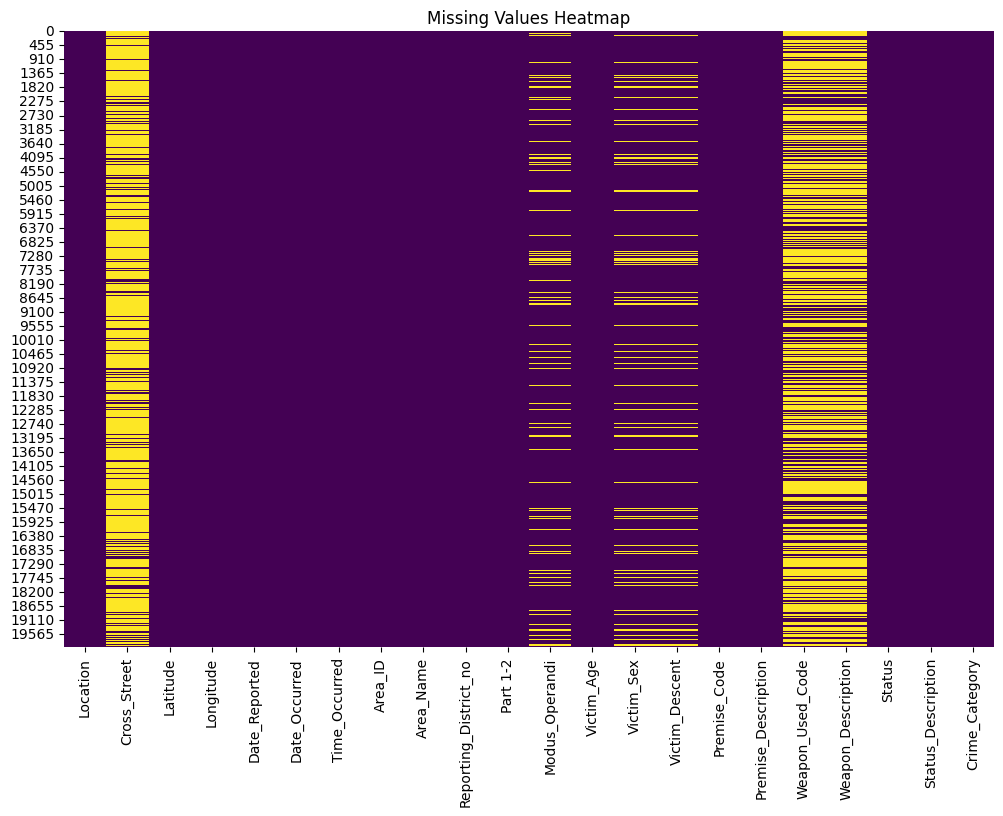

In [13]:

# Visualize Missing Values
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()





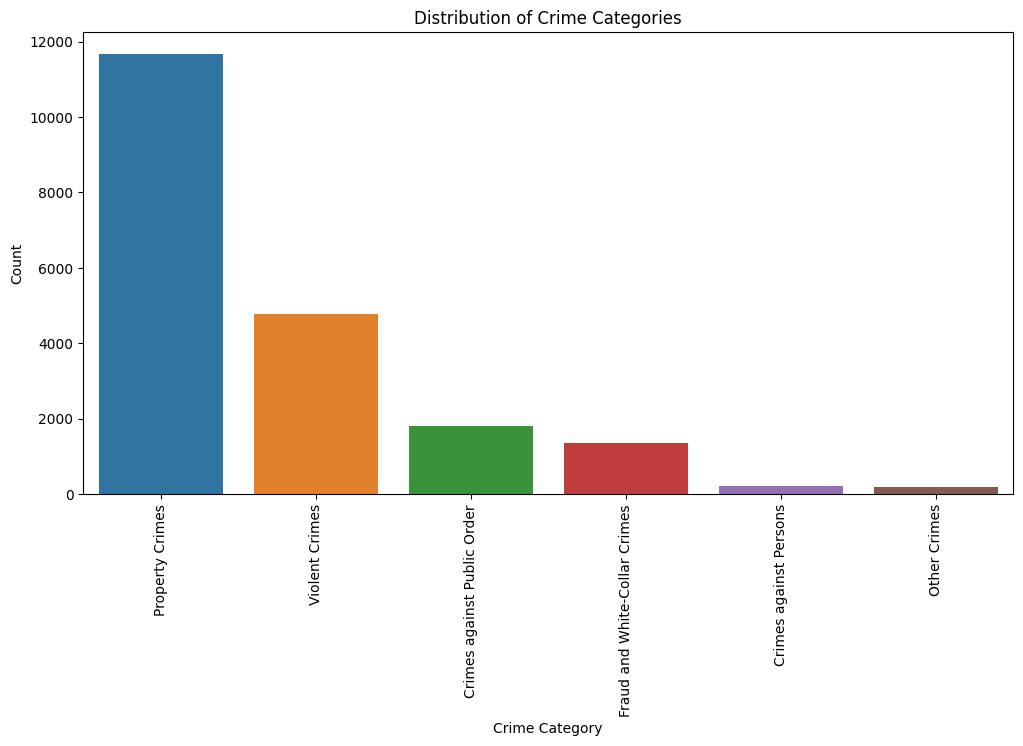

In [14]:
# Distribution of Target Variable (Crime_Category)
plt.figure(figsize=(12, 6))
sns.countplot(x='Crime_Category', data=train_df, order=train_df['Crime_Category'].value_counts().index)
plt.title('Distribution of Crime Categories')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


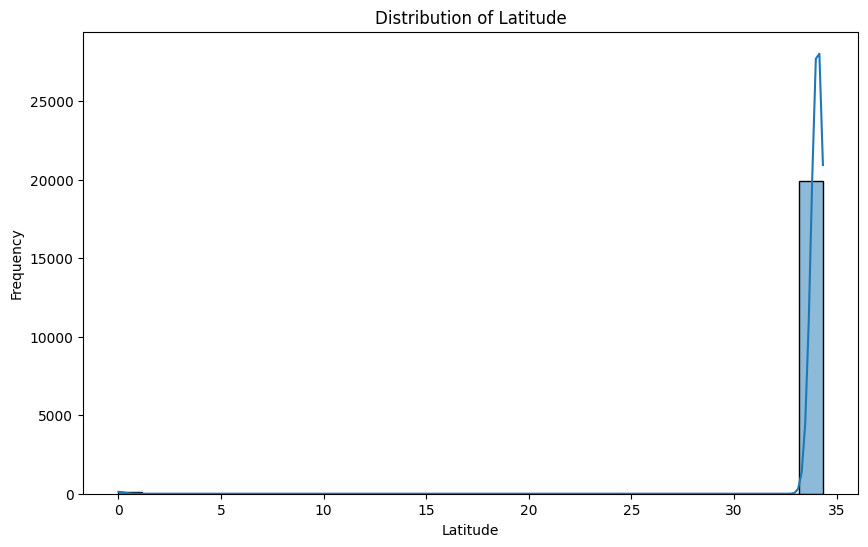

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


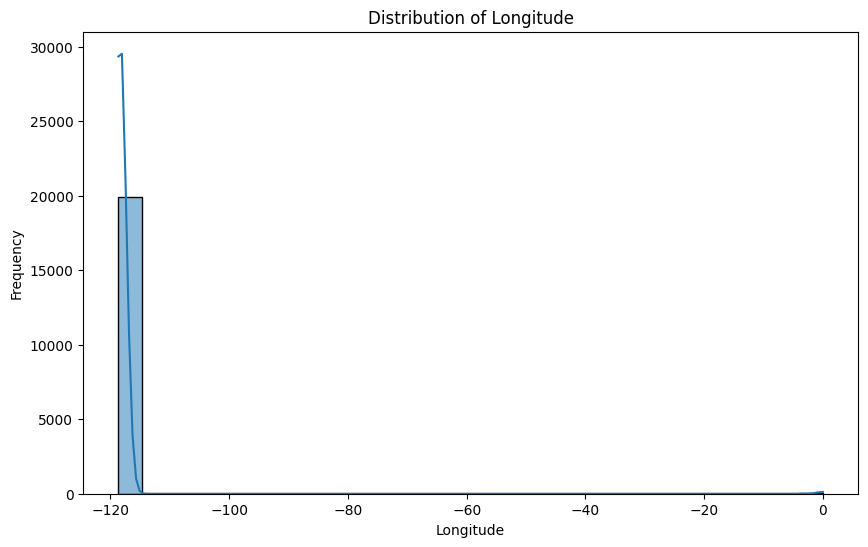

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


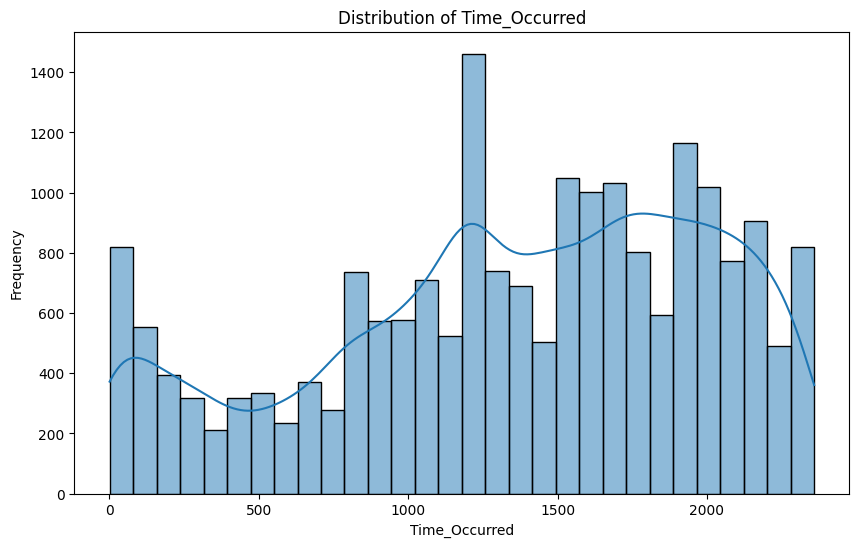

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


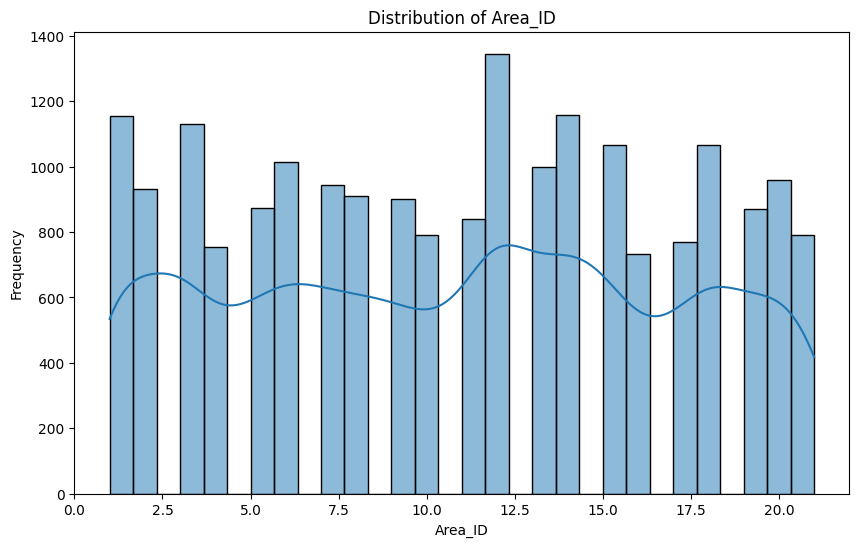

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


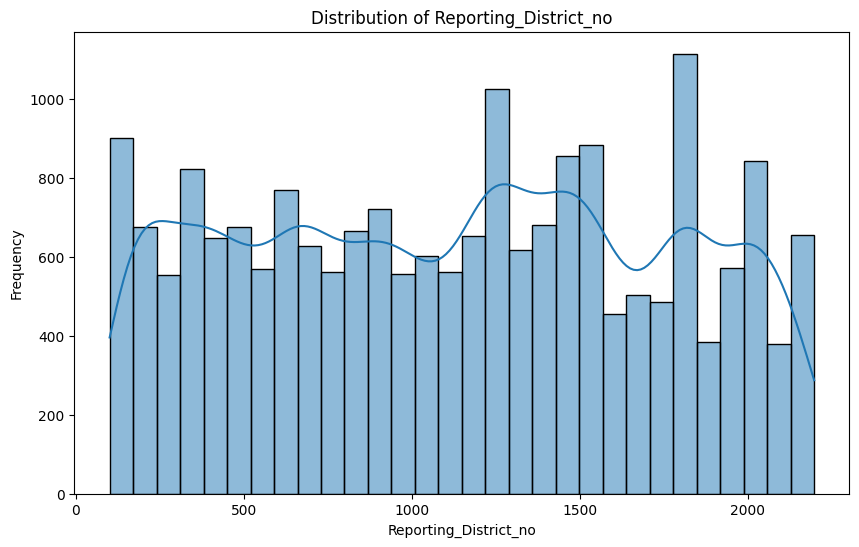

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


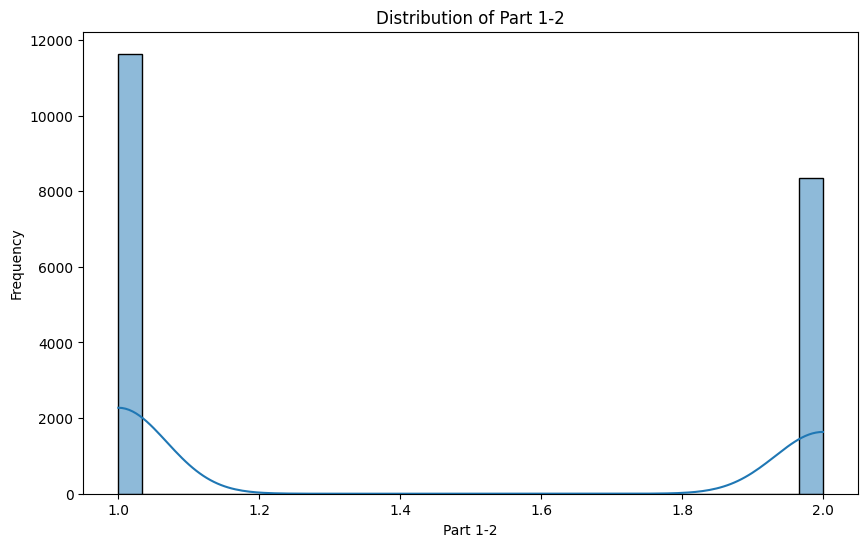

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


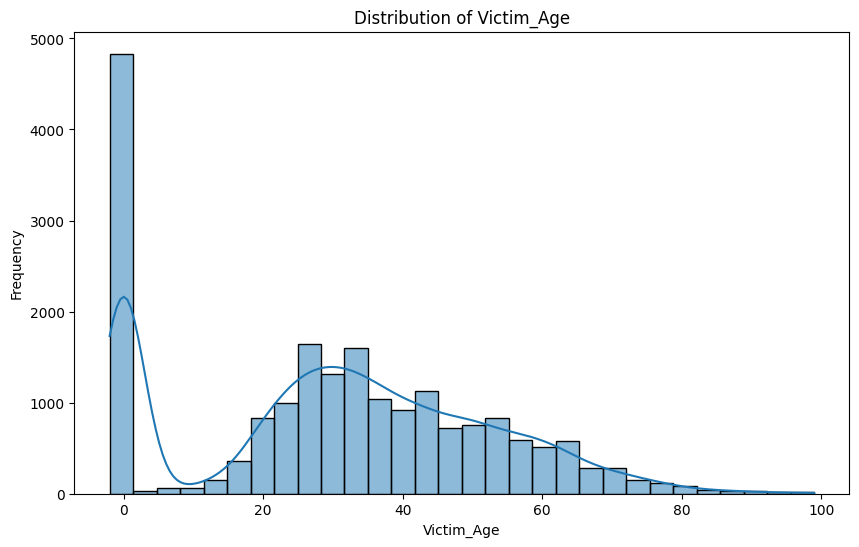

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


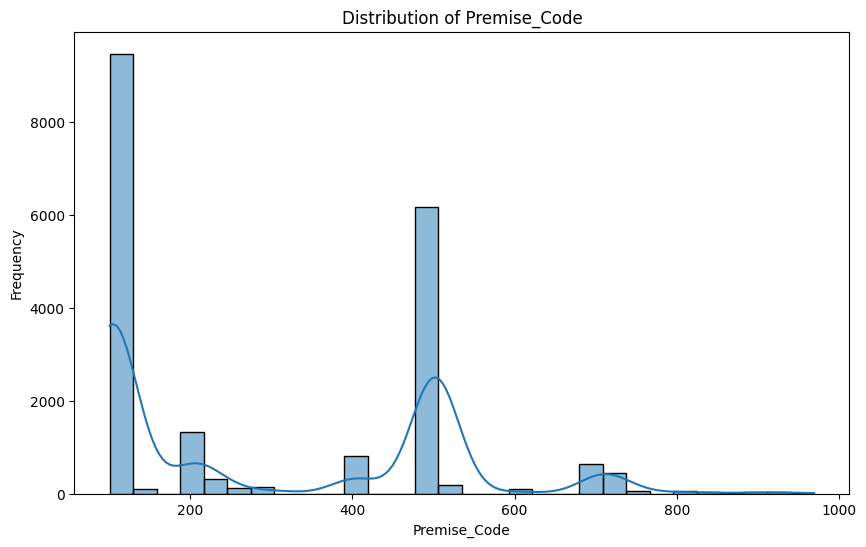

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


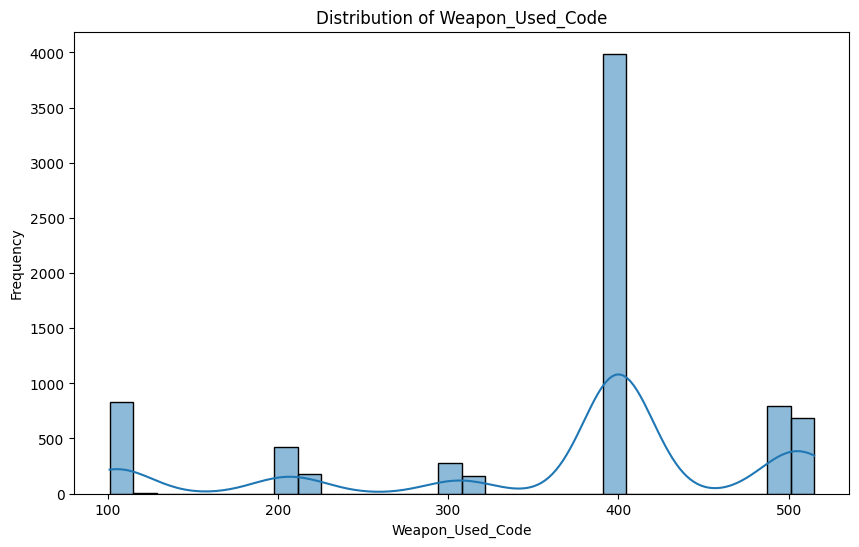

In [15]:
# Distribution Plots for Numeric Columns
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

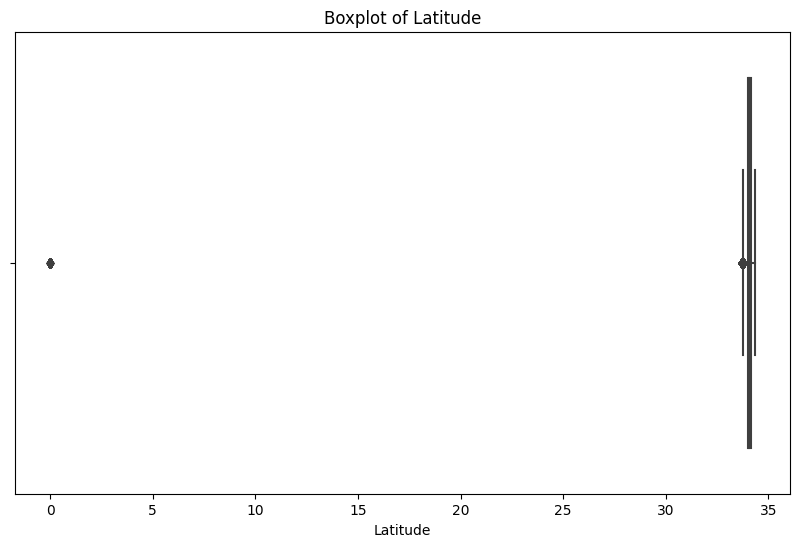

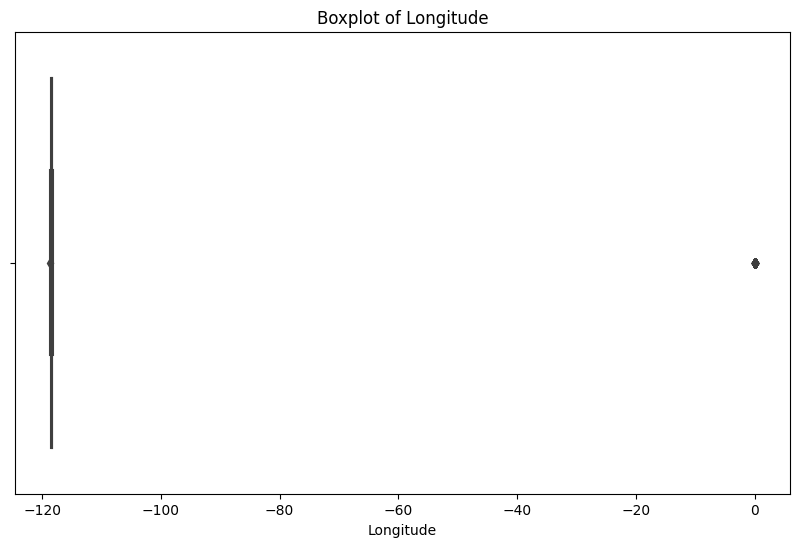

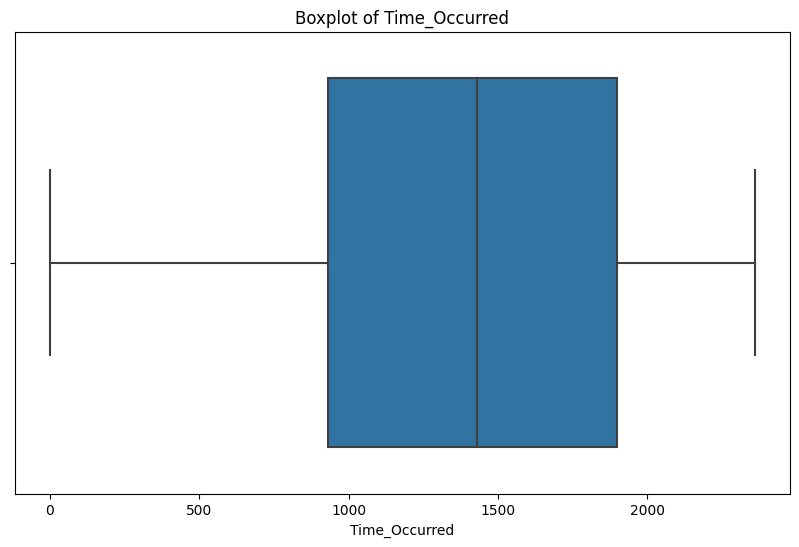

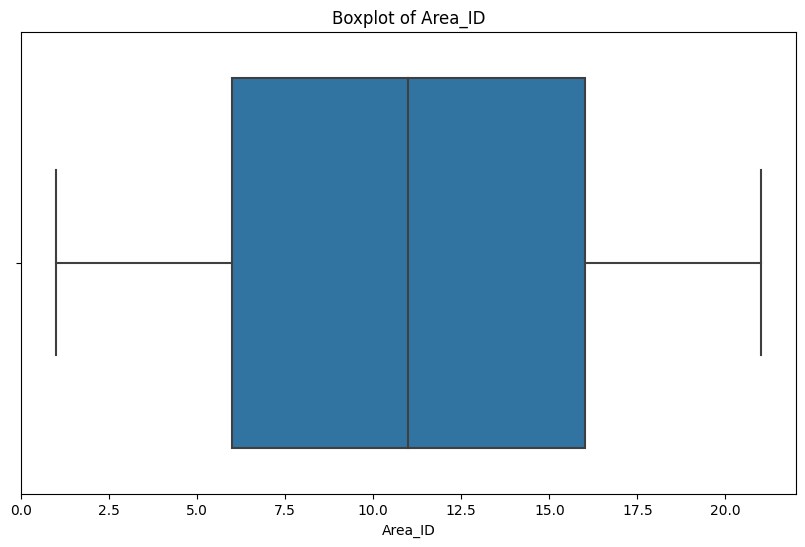

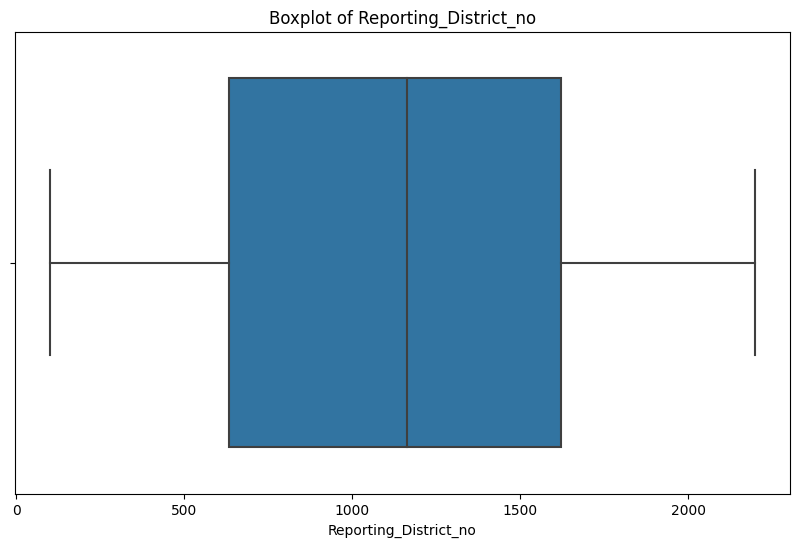

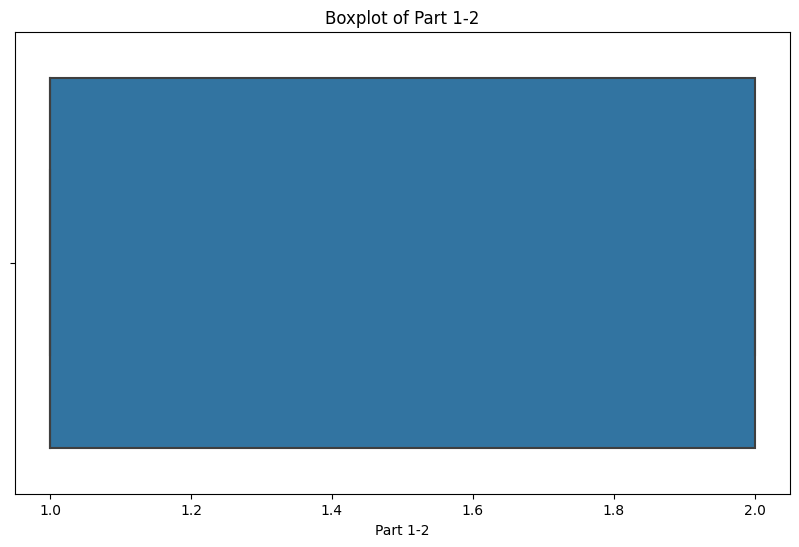

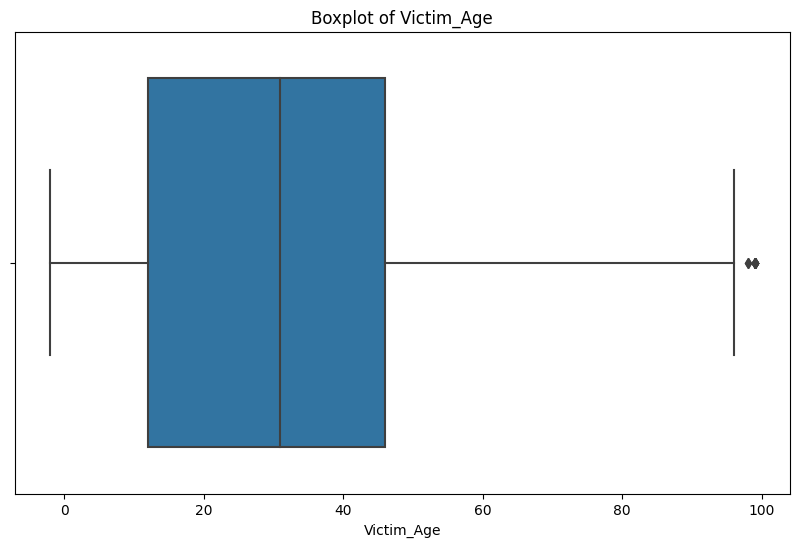

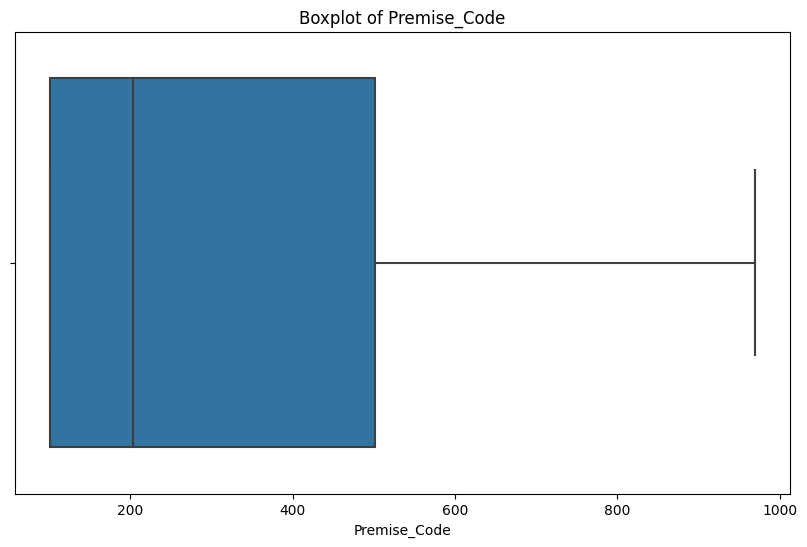

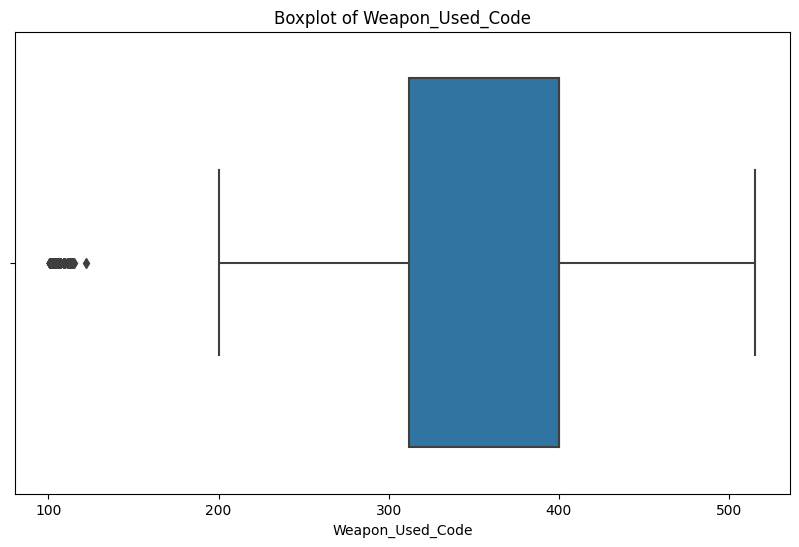

In [16]:

# Boxplots For Numeric Columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


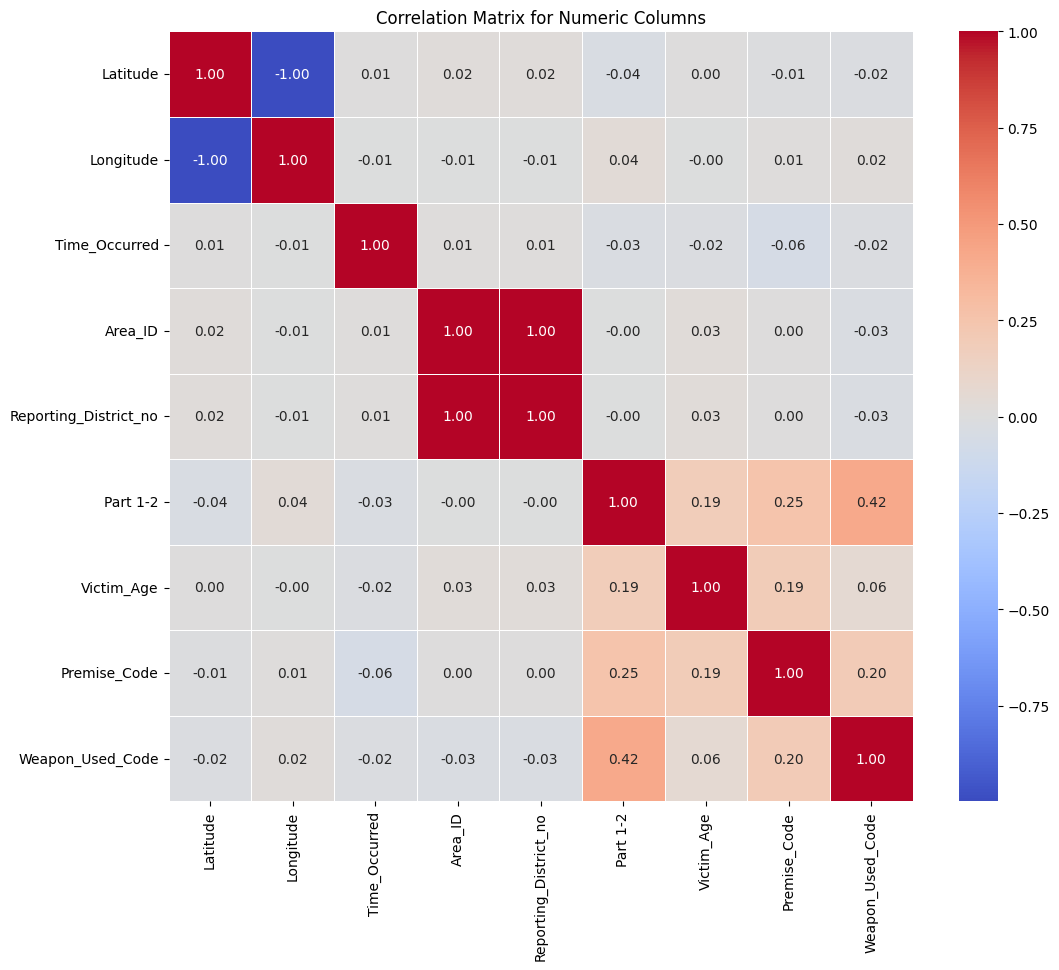

In [17]:
# CORRELATION MATRIX

# Compute the correlation matrix for numeric columns

numeric_df = train_df[numeric_columns]
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

In [18]:
train_df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

#    FEATURE ENGEERING

In [19]:
# Convert date columns to datetime
train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
train_df['Date_Occurred'] = pd.to_datetime(train_df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Feature Engineering
train_df['Reported_Year'] = train_df['Date_Reported'].dt.year
train_df['Reported_Month'] = train_df['Date_Reported'].dt.month
train_df['Reported_Day'] = train_df['Date_Reported'].dt.day
train_df['Occurred_Year'] = train_df['Date_Occurred'].dt.year
train_df['Occurred_Month'] = train_df['Date_Occurred'].dt.month
train_df['Occurred_Day'] = train_df['Date_Occurred'].dt.day

# Calculate time difference in days
train_df['Time_Difference'] = (train_df['Date_Reported'] - train_df['Date_Occurred']).dt.days

# Drop original date columns and redundant columns also
train_df.drop(columns=['Date_Reported', 'Date_Occurred','Location', 'Cross_Street','Premise_Description','Weapon_Description'], inplace=True)

# ENCODING AND SCALING OF FEATURES 

In [20]:
# Apply LabelEncoder to 'Modus_Operandi'
train_df['Modus_Operandi'] = train_df['Modus_Operandi'].astype(str)

# Separate features and target variable
X = train_df.drop(columns=['Crime_Category'])
y = train_df['Crime_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns.drop('Modus_Operandi')

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# TF-IDF Vectorizer for 'Modus_Operandi'
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'Modus_Operandi')
    ]
)


#                   MODEL TRAINING      

# DECISION TREE CLASSIFIER

In [21]:
# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', decision_tree_model)])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

# CHECKING THE ACCURACY SCORE

In [22]:
# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate accuracy for the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification report for the test set
classification_rep = classification_report(y_test, y_test_pred)

# Print training accuracy, test accuracy, and the classification report
print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print('Classification Report:')
print(classification_rep)


Training Accuracy: 1.000
Test Accuracy: 0.939
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.50      0.62      0.56        32
  Crimes against Public Order       0.80      0.80      0.80       374
Fraud and White-Collar Crimes       0.93      0.94      0.93       267
                 Other Crimes       0.38      0.31      0.34        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.93      0.92      0.92       989

                     accuracy                           0.94      4000
                    macro avg       0.75      0.76      0.76      4000
                 weighted avg       0.94      0.94      0.94      4000



# HYPERPARAMTER TUNNING OF DECISION TREE CLASSIFIER

In [23]:
# Define the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', decision_tree_model)])

# Define the hyperparameter grid
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.940


# SUPPORT VECTOR CLASSIFIER(SVC)

In [24]:
# Initialize the SVC model
svc_model = SVC(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svc_model)])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Output the predictions
y_pred


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

# CHECKING THE ACCURACY SCORE

In [25]:
# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate accuracy for the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification report for the test set
classification_rep = classification_report(y_test, y_test_pred)

# Print training accuracy, test accuracy, and the classification report
print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print('Classification Report:')
print(classification_rep)


Training Accuracy: 0.952
Test Accuracy: 0.930
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.65      0.34      0.45        32
  Crimes against Public Order       0.82      0.75      0.78       374
Fraud and White-Collar Crimes       0.91      0.91      0.91       267
                 Other Crimes       0.00      0.00      0.00        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.86      0.95      0.91       989

                     accuracy                           0.93      4000
                    macro avg       0.70      0.65      0.67      4000
                 weighted avg       0.92      0.93      0.93      4000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CROSSS VALIDATION ON SVC

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

# Initialize the SVC model
svc_model = SVC(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svc_model)])

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print the cross-validation scores and mean score
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: {:.3f}".format(np.mean(cv_scores)))

# Fit the model on the full training set
clf.fit(X_train, y_train)

# Make predictions using the fitted model
y_pred = clf.predict(X_test)

# Output the predictions
y_pred


Cross-validation scores:  [0.925     0.93125   0.9234375 0.93      0.93125  ]
Mean cross-validation score: 0.928


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

# ADABOOST CLASSIFIER

In [27]:
# Initialize the AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ada_model)])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Output the predictions
y_pred


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Crimes against Persons', 'Crimes against Persons',
       'Property Crimes'], dtype=object)

# CHECKING THE ACCURACY SCORE

In [28]:
# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate accuracy for the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification report for the test set
classification_rep = classification_report(y_test, y_test_pred)

# Print training accuracy, test accuracy, and the classification report
print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print('Classification Report:')
print(classification_rep)


Training Accuracy: 0.724
Test Accuracy: 0.728
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.04      0.66      0.07        32
  Crimes against Public Order       0.76      0.54      0.63       374
Fraud and White-Collar Crimes       0.71      0.97      0.82       267
                 Other Crimes       0.20      0.03      0.05        35
              Property Crimes       0.87      0.74      0.79      2303
               Violent Crimes       0.91      0.75      0.82       989

                     accuracy                           0.73      4000
                    macro avg       0.58      0.61      0.53      4000
                 weighted avg       0.84      0.73      0.78      4000



# HYPER PARAMTER TUNNING THE ADABOOST CLASSIFIER

In [29]:
# Initialize the AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ada_model)])

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output the predictions
y_pred


Best parameters found:  {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 200}
Best cross-validation score: 0.807


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

# RANDOM FOREST CLASSIFIER

In [30]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_model)])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Output the predictions
y_pred


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

# CHECKING THE ACCURACY SCORE

In [31]:
# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate accuracy for the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification report for the test set
classification_rep = classification_report(y_test, y_test_pred)

# Print training accuracy, test accuracy, and the classification report
print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')
print('Classification Report:')
print(classification_rep)


Training Accuracy: 1.000
Test Accuracy: 0.946
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.56      0.16      0.24        32
  Crimes against Public Order       0.88      0.82      0.85       374
Fraud and White-Collar Crimes       0.95      0.91      0.93       267
                 Other Crimes       0.67      0.06      0.11        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.90      0.98      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.82      0.65      0.67      4000
                 weighted avg       0.94      0.95      0.94      4000



# HYPER PARAMTER TUNNING THE RANDOM FOREST CLASSIFIER

In [32]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create the Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_model)])

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output the predictions
y_pred


Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best cross-validation score: 0.950


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

# CONFUSION MATRIX FOR RANDOM FOREST MODEL

Confusion Matrix:
[[   9    3    0    0    1   19]
 [   1  315    7    1   12   38]
 [   0   17  245    0    5    0]
 [   0   18    4    3    9    1]
 [   0    0    2    0 2264   37]
 [   4    9    0    0    8  968]]


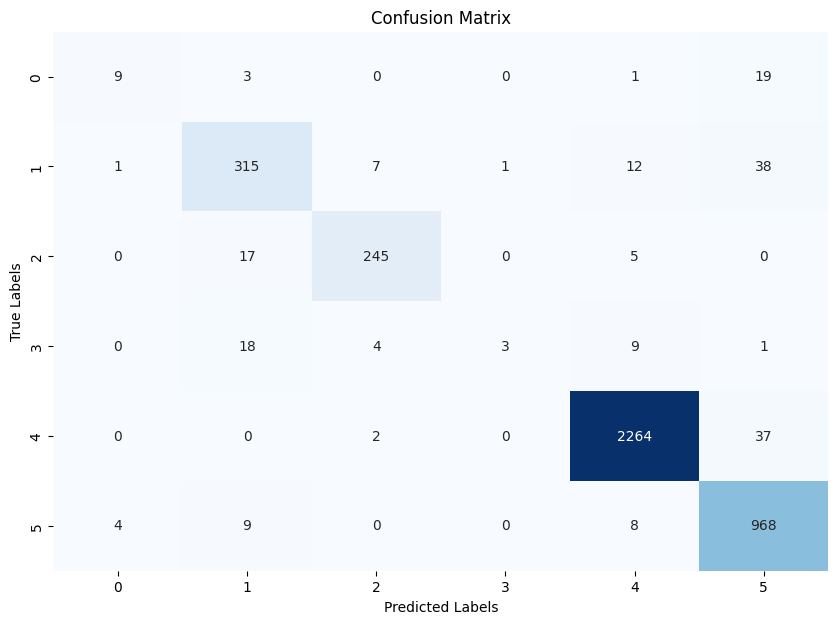


Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.64      0.28      0.39        32
  Crimes against Public Order       0.87      0.84      0.86       374
Fraud and White-Collar Crimes       0.95      0.92      0.93       267
                 Other Crimes       0.75      0.09      0.15        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.91      0.98      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.85      0.68      0.71      4000
                 weighted avg       0.95      0.95      0.95      4000


Accuracy Score: 0.951


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already predicted y_pred using the best model from GridSearchCV

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score: {:.3f}".format(accuracy_score(y_test, y_pred)))


# COMPARING ACCURACY SCORE ACROSS MODELS

In [34]:
decision_tree = 0.940
svc = 0.947
adaboost= 0.807
randomforest = 0.950

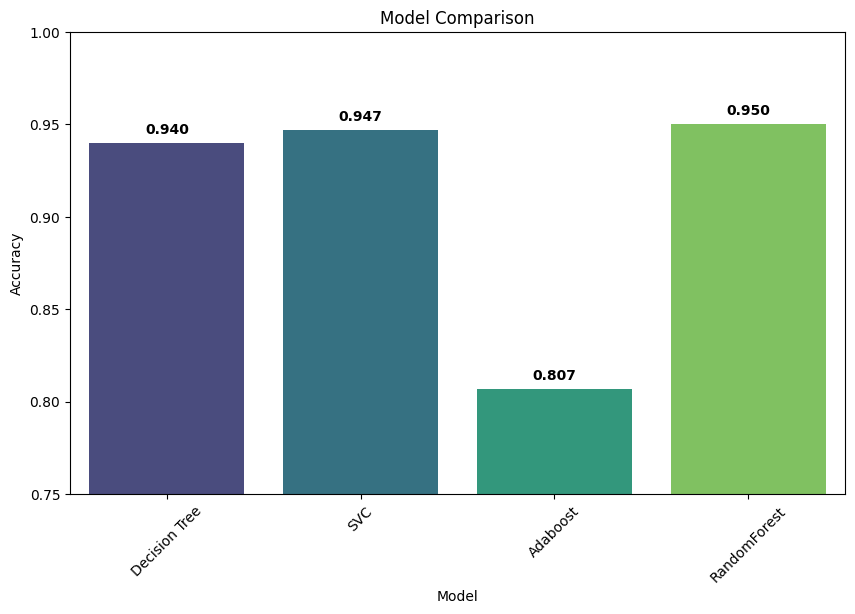

In [35]:
# Define the models and their accuracies
models = ['Decision Tree', 'SVC', 'Adaboost', 'RandomForest']
accuracies = [0.940, 0.947, 0.807, 0.950]

# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracies}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

# Add title and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1.0)  # Adjusted y-limit to fit the accuracy text

# Add accuracy scores on top of each bar
for index, row in df.iterrows():
    plt.text(index, row['Accuracy'] + 0.005, f"{row['Accuracy']:.3f}", 
             color='black', ha="center", fontweight='bold')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [36]:
'''Based on the bar plot showing the accuracies of different models, here’s a conclusion:

Model Performance:

Random Forest: Achieved the highest accuracy of 0.950. This suggests that Random Forests performed the best among the models listed, likely due to their ability to handle complex data patterns and reduce overfitting.
SVC (Support Vector Classification): Followed closely with an accuracy of 0.947. This high accuracy indicates that SVC is also performing very well, especially in handling the classification task with potentially high-dimensional data.
Decision Tree: Has a high accuracy of 0.940, which is quite good but slightly lower than SVC and Random Forest. Decision Trees are interpretable but can be prone to overfitting unless properly tuned.
AdaBoost: Shows the lowest accuracy of 0.807. This indicates that, while AdaBoost is generally good for improving weak learners, it may not have performed as well on this specific dataset compared to the other models.'''
'''General Observations:


High Accuracy Models: Random Forest and SVC are the most accurate, suggesting they might be better suited for this dataset.
Potential Issues with AdaBoost: The significantly lower accuracy for AdaBoost could indicate that it either struggled with the dataset's specifics or that its hyperparameters might need further tuning.
Overall Performance: All models are performing well, with accuracies ranging from 0.807 to 0.950. The results suggest that you have several strong models, with Random Forest and SVC being the top performers.
In summary, Random Forest and SVC are the top-performing models based on accuracy, while AdaBoost may require further tuning or might not be as suitable for this dataset.'''








"General Observations:\n\n\nHigh Accuracy Models: Random Forest and SVC are the most accurate, suggesting they might be better suited for this dataset.\nPotential Issues with AdaBoost: The significantly lower accuracy for AdaBoost could indicate that it either struggled with the dataset's specifics or that its hyperparameters might need further tuning.\nOverall Performance: All models are performing well, with accuracies ranging from 0.807 to 0.950. The results suggest that you have several strong models, with Random Forest and SVC being the top performers.\nIn summary, Random Forest and SVC are the top-performing models based on accuracy, while AdaBoost may require further tuning or might not be as suitable for this dataset."

# Based on the graph, it's evident that RANDOM FOREST  CLASSIFIER  has the highest accuracy score, making it the preferred model for making predictions.

# PREPROCESSING OF DATA

# APPLY SAME PREPROCESSING ON TEST DATA

In [37]:
# Load the test dataset
test_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# Data Preprocessing for Test Set
test_df['Date_Reported'] = pd.to_datetime(test_df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
test_df['Date_Occurred'] = pd.to_datetime(test_df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Feature Engineering for Test Data
test_df['Reported_Year'] = test_df['Date_Reported'].dt.year
test_df['Reported_Month'] = test_df['Date_Reported'].dt.month
test_df['Reported_Day'] = test_df['Date_Reported'].dt.day
test_df['Occurred_Year'] = test_df['Date_Occurred'].dt.year
test_df['Occurred_Month'] = test_df['Date_Occurred'].dt.month
test_df['Occurred_Day'] = test_df['Date_Occurred'].dt.day
test_df['Time_Difference'] = (test_df['Date_Reported'] - test_df['Date_Occurred']).dt.days

# Drop specified columns
test_df.drop(columns=['Date_Reported', 'Date_Occurred', 'Location', 'Cross_Street', 'Premise_Description', 'Weapon_Description'], inplace=True)

# Handle missing values and preprocess 'Modus_Operandi'
test_df['Modus_Operandi'] = test_df['Modus_Operandi'].astype(str)

# Ensure test dataset has the same columns as the training dataset
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)

# Preprocess the test data using the fitted pipeline from the best model
X_test_processed = grid_search.best_estimator_.named_steps['preprocessor'].transform(test_df)

# Make predictions using the best Random Forest model
test_predictions = grid_search.best_estimator_.named_steps['classifier'].predict(X_test_processed)


# CREATING SUBMISSION FILE FOR RANDOM FOREST CLASSIFIER MODEL

In [38]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'ID': range(1, len(test_predictions) + 1), 
    'Crime_Category': test_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.
